In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
train = pd.read_csv('../data/KDDTrain.txt', delimiter=',', header=None)
test = pd.read_csv('../data/KDDTest.txt', delimiter=',', header=None)

In [3]:
train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']
test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,success_pred
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

So there's no missing values in train data.

In [6]:
def null_values(df):
    """"
    Returns the number of null values in a dataframe.
    """
    # Create a Boolean mask for null values
    null_mask = df.isnull()
    # Sum the Boolean mask to get the total number of null values
    null_values = null_mask.sum().sum()

    return null_values

num_null = null_values(test)
print(f'The test dataset has {num_null} null values in total.')

The test dataset has 0 null values in total.


In [7]:
def infer_data_types(df):
    # Dictionary to store the inferred data type of each column
    data_types = {'binary': [], 'categorical': [], 'discrete': [], 'continuous': [], 'unknown': []}

    for col in df.columns:
        # Check if column contains only 2 unique values
        if len(df[col].unique()) == 2:
            data_types['binary'].append(col)
        # Check if column has data type 'object' or 'category'
        elif df[col].dtype == np.object_ or pd.api.types.is_categorical_dtype(df[col]):
            data_types['categorical'].append(col)
        # Check if column contains only integers
        elif pd.api.types.is_integer_dtype(df[col]):
            data_types['discrete'].append(col)
        # Check if column contains only float values
        elif pd.api.types.is_float_dtype(df[col]):
            data_types['continuous'].append(col)
        else:
            data_types['unknown'].append(col)

    return data_types

data_types = infer_data_types(train)
print('Binary columns:', data_types['binary'])
print('Categorical columns:', data_types['categorical'])
print('Discrete columns:', data_types['discrete'])
print('Continuous columns:', data_types['continuous'])
print('Unknown columns:', data_types['unknown'])

Binary columns: ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']
Categorical columns: ['protocol_type', 'service', 'flag', 'attack_type']
Discrete columns: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'success_pred']
Continuous columns: ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Unknown columns: []


In [8]:
def get_attack_category(attack_type):
    """
    Group the attack types into the categories of DOS, Probe, U2R, and R2L
    """
    if attack_type in ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']:
        return 'DOS'
    elif attack_type in ['ipsweep', 'nmap', 'portsweep', 'satan']:
        return 'Probe'
    elif attack_type in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']:
        return 'U2R'
    elif attack_type in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']:
        return 'R2L'
    else:
        return 'Normal'

# New column 'attack_category' in train and test
train['attack_category'] = train['attack_type'].apply(get_attack_category)
test['attack_category'] = test['attack_type'].apply(get_attack_category)


In [9]:
# Group by the 'attack_category' column and count the frequency
train_attack_type_count = train.groupby('attack_category')['attack_category'].count()
test_attack_type_count = test.groupby('attack_category')['attack_category'].count()

# Calculate the percentage of each attack type
train_attack_type_percentage = round((train_attack_type_count / train_attack_type_count.sum()) * 100, 2)
test_attack_type_percentage = round((test_attack_type_count / test_attack_type_count.sum()) * 100, 2)

# Create a new DataFrame to store the result
result_df = pd.concat([train_attack_type_count, train_attack_type_percentage, test_attack_type_count, test_attack_type_percentage], axis=1)
result_df.columns = ['Train Set frequency', 'Percentage', 'Test Set frequency', 'Percentage']

# Sort the DataFrame by frequency in descending order
result_df = result_df.sort_values(by='Train Set frequency', ascending=False)

# the result
result_df


,Train Set frequency,Percentage,Test Set frequency,Percentage
attack_category,,,,
Normal,67343,53.46,13461,59.71
DOS,45927,36.46,5741,25.47
Probe,11656,9.25,1106,4.91
R2L,995,0.79,2199,9.75
U2R,52,0.04,37,0.16


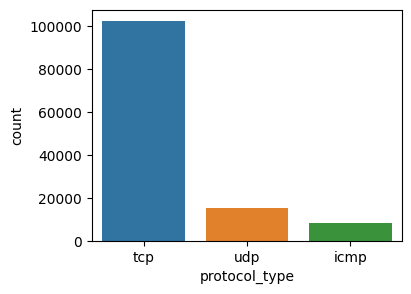

In [10]:
# protocol type distribution
plt.figure(figsize=(4,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

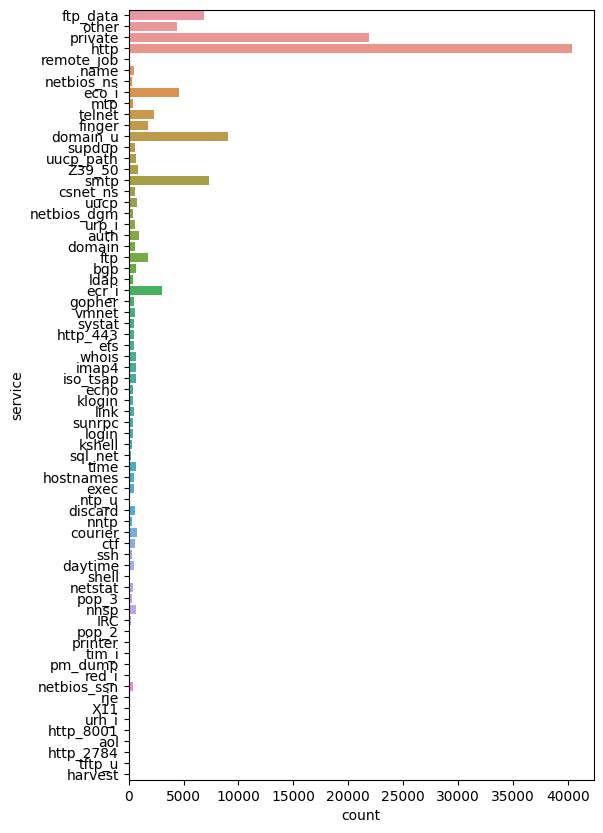

In [11]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

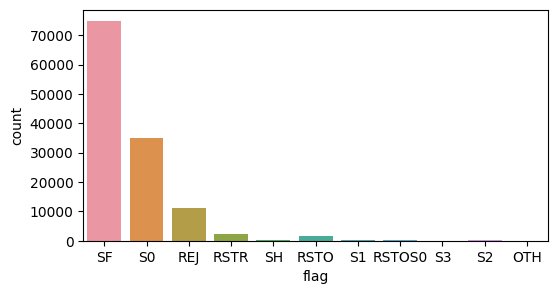

In [12]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

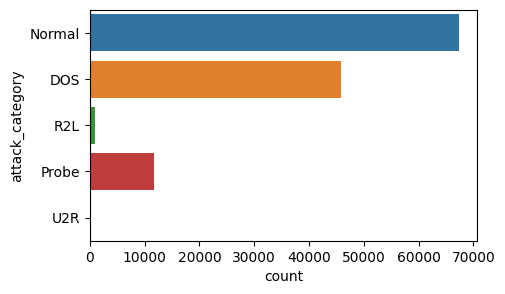

In [13]:
# attack category distribution
plt.figure(figsize=(5,3))
sns.countplot(y="attack_category", data=train)
plt.show()

In [14]:
# Define a mapping of attack types to numerical values
attack_mapping = {
    'Normal': 0,
    'DOS': 1,
    'Probe': 2,
    'R2L': 3,
    'U2R': 4
}

# Make attack type numerical
train['attack_num'] = train['attack_category'].map(attack_mapping)
test['attack_num'] = test['attack_category'].map(attack_mapping)

In [18]:
# Create a list of numerical column names
numerical_features = sum([data_types['binary'], data_types['discrete'], data_types['continuous'], ["attack_num"]], [])

In [19]:
train_num = train[numerical_features]
test_num = test[numerical_features]

In [20]:
train_cat = train[data_types["categorical"]]
test_cat = test[data_types["categorical"]]

In [17]:
# Mean of each feature grouped by (attack type (numerical) / Response variable)
# train[data_types['continuous']].groupby(train['attack_num']).mean().T
# train[numerical_features].groupby(train['attack_num']).mean().T

In [21]:
# Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99)) # set any values above the 99th percentile to the value at the 99th percentile
    x = x.clip(lower=x.quantile(0.01)) # set any values below the 1st percentile to the value at the 1st percentile
    return x

train_num = train[numerical_features].apply(outlier_capping)

In [22]:
def create_dummies(df, colname):
    """"
    Creates dummy variable
    """
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis = 1, inplace = True)
    return(df)

In [23]:
for c_feature in data_types["categorical"]:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)

In [24]:
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,attack_type_snmpgetattack,attack_type_snmpguess,attack_type_sqlattack,attack_type_teardrop,attack_type_udpstorm,attack_type_warezmaster,attack_type_worm,attack_type_xlock,attack_type_xsnoop,attack_type_xterm
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)

<Axes: >

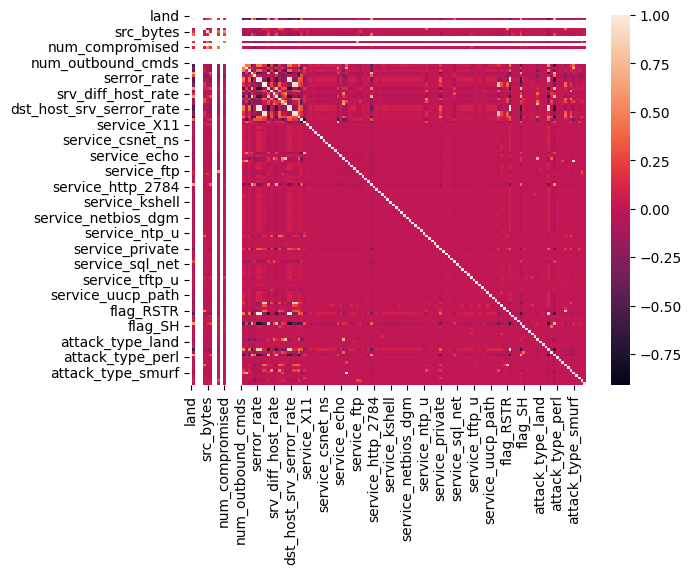

In [27]:
# Correlation matrix
corm = train_new.corr()
# visualize correlation matrix
sns.heatmap(corm)

C:\Users\avish\AppData\Local\Temp\ipykernel_22196\2350442315.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr(method='pearson')


<Axes: >

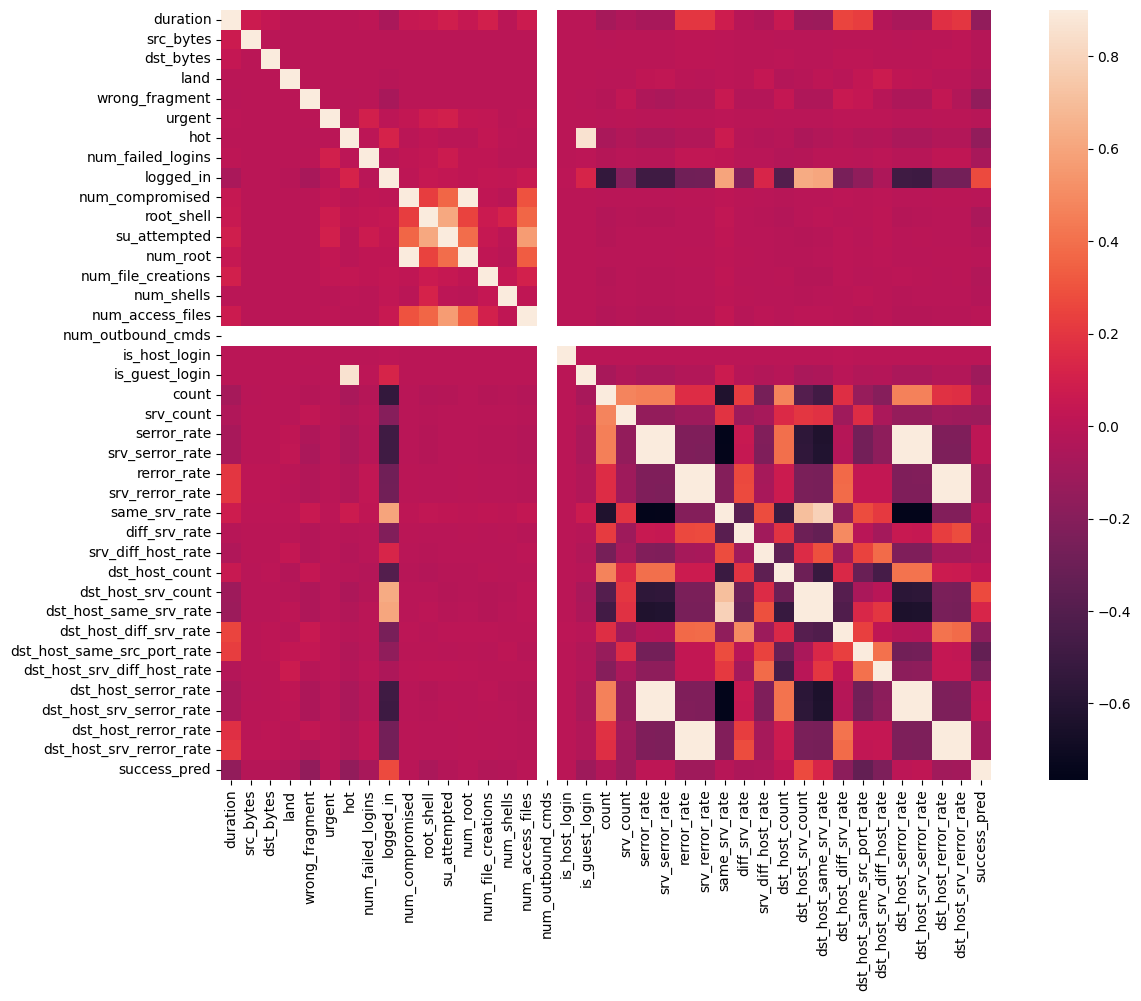

In [27]:
corr_matrix = train.corr(method='pearson')
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,vmax=0.9,square = True) 

In [28]:
train_new.shape

(125973, 143)

In [29]:
test_new.shape

(22544, 152)

In [51]:
# Drop columns in the test set that are not in the training set
missing_cols = set(test_new.columns) - set(train_new.columns)
# print(missing_cols)
test_new = test_new.drop(missing_cols, axis=1)


In [50]:
# Drop columns in the training set that are not in the test set
missing_cols = set(train_new.columns) - set(test_new.columns)
# print(missing_cols)
train_new = train_new.drop(missing_cols, axis=1)

#### Variable Selection

In [52]:
X = train_new[train_new.columns.difference(['attack_num'])]

In [53]:
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_num'] )

d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  45  46  47  49  51  52  53  54  55  59 130 132 133] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [54]:
# capturing important features
KBest_features = X.columns[X_new.get_support()]
KBest_features

Index(['attack_type_neptune', 'attack_type_normal', 'count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_serror_rate', 'flag_S0', 'flag_SF', 'logged_in',
       'same_srv_rate', 'serror_rate', 'service_http', 'srv_serror_rate',
       'success_pred'],
      dtype='object')

### Model Fit

In [55]:
y_train = train_new['attack_num']
X_train = train_new.drop('attack_num', axis=1)
y_test = test_new['attack_num']
X_test = test_new.drop('attack_num', axis=1)

#### Logistic Regression

In [56]:
# Fit logistic regression model
lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# Predict on test set
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print('Accuracy score: %f' % lr_acc)

Accuracy score: 0.744677


In [68]:
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')
print('Precision: %f' % lr_precision)
print('Recall: %f' % lr_recall)
print('F1 score: %f' % lr_f1)

Precision: 0.642986
Recall: 0.744677
F1 score: 0.688644


d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Neural Network 1

In [77]:
# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)



# create the neural network with the correct input dimensions
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile and fit the model as before
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)

Epoch 1/1000


d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3937/3937 - 6s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 6s/epoch - 2ms/step
Epoch 2/1000
3937/3937 - 3s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 3s/epoch - 855us/step
Epoch 3/1000
3937/3937 - 3s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 3s/epoch - 846us/step
Epoch 4/1000
3937/3937 - 3s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 3s/epoch - 868us/step
Epoch 5/1000
3937/3937 - 3s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 3s/epoch - 849us/step
Epoch 6/1000
Restoring model weights from the end of the best epoch: 1.
3937/3937 - 3s - loss: 6.7503e-08 - accuracy: 0.3707 - val_loss: 7.7721e-08 - val_accuracy: 0.2609 - 3s/epoch - 870us/step
Epoch 6: early stopping
Epoch 1/1000
3937/3937 - 4s - loss: -6.0020e+05 - accuracy: 0.7201 - val_loss: 2803419.7500 - val_accuracy: 0.6809 -

In [106]:
# Measure accuracy
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
score = accuracy_score(y_test, pred_classes)
print('Accuracy score: %f' % score)

705/705 [==============================] - 1s 845us/step
Accuracy score: 0.597099


In [108]:
nn1_precision = precision_score(y_test, pred_classes, average='weighted')
nn1_recall = recall_score(y_test, pred_classes, average='weighted')
nn1_f1 = f1_score(y_test, pred_classes, average='weighted')
print('Precision: %f' % nn1_precision)
print('Recall: %f' % nn1_recall)
print('F1 score: %f' % nn1_f1)

Precision: 0.356527
Recall: 0.597099
F1 score: 0.446469


d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Neural Network 2

In [111]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [112]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [113]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [114]:
y_pred_nn2 = mlp.predict(test_X)

In [118]:
print(confusion_matrix(y_test,y_pred_nn2))

[[10158   963  2340     0     0]
 [    0  5739     2     0     0]
 [    0     0  1106     0     0]
 [    0     0  2199     0     0]
 [    4     0    33     0     0]]


In [121]:
print(classification_report(y_test,y_pred_nn2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     13461
           1       0.86      1.00      0.92      5741
           2       0.19      1.00      0.33      1106
           3       0.00      0.00      0.00      2199
           4       0.00      0.00      0.00        37

    accuracy                           0.75     22544
   macro avg       0.41      0.55      0.42     22544
weighted avg       0.82      0.75      0.76     22544



d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Study\UBC\Block_6\DATA-586-Advanced-Machine-Learning\Project\Network-Intrusion-Detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [122]:
accuracy_score(y_test, y_pred_nn2)

0.7542139815471965